In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ins=pd.read_csv('insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print('Number of rows and columns in insurance data',ins.shape)

Number of rows and columns in insurance data (1338, 7)


For visualization purpose we are taking 

BMI as independent

Charges as dependent

E:\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


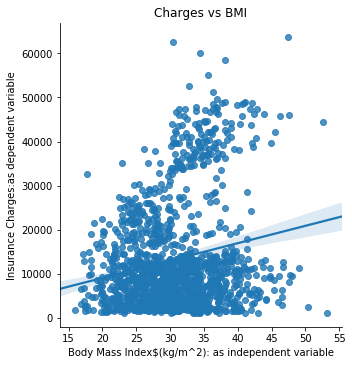

In [5]:
sns.lmplot(x='bmi',y='charges',data=ins)
plt.xlabel('Body Mass Index$(kg/m^2): as independent variable')
plt.ylabel('Insurance Charges:as dependent variable')
plt.title('Charges vs BMI');

In above plot we fit regression line into the variables

Cost function

A cost function measures how much error in the model is in terms of ability to estimate the relationship between  x  and  y . 
We can measure the accuracy of our hypothesis function by using a cost function. 
This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.

Normal Equation

The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. 
To minimize our cost function, take partial derivative of  J(θ)  with respect to  θ  and equate to  0 . 
The derivative of function is nothing but if a small change in input what would be the change in output of function.

Exploratory Data Analysis

In [6]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check for missing values

Text(0.5, 1.0, 'Missing Values in the Data')

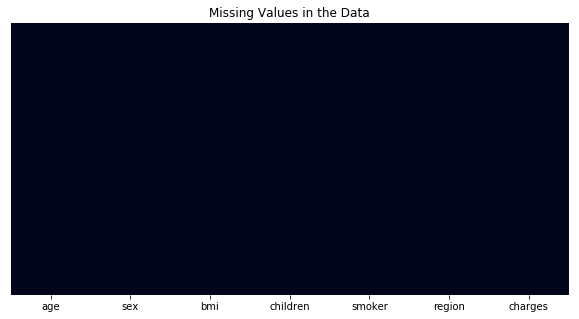

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(ins.isnull(),cbar=False,yticklabels=False)
plt.title('Missing Values in the Data')

There is no missing values in the data so we can procced further process

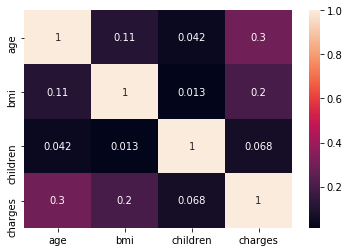

In [8]:
# correlation plot
cor=ins.corr()
sns.heatmap(cor,cbar='Wistia',annot=True)

There is no Correlation 

Plot

E:\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Charges')

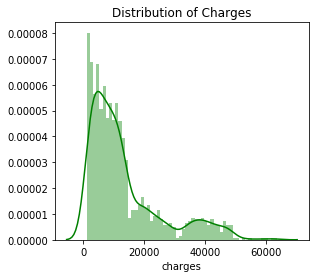

In [9]:
fig=plt.figure(figsize=(10,4))

ax=fig.add_subplot(121)
sns.distplot(ins['charges'],bins=60,color='green')
plt.title('Distribution of Charges')

E:\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


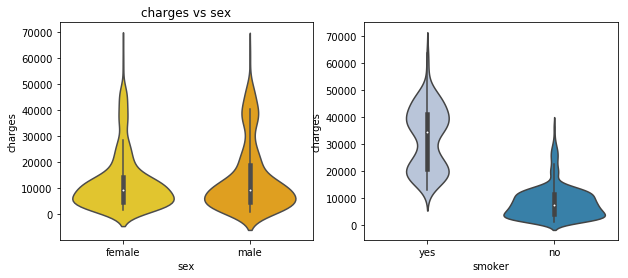

In [10]:
fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(121)
sns.violinplot(x='sex',y='charges',data=ins,palette='Wistia',)
plt.title('charges vs sex')

fig2=fig.add_subplot(122)
sns.violinplot(x='smoker',y='charges',data=ins,palette="PuBu")

The insurance charge for male and female is approximatley in same range it is average around 5000 bucks. 
In right plot the insurance charge for smokers is much wide range compare to non smokers.

the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.



Next we look into childrens Insurance charges

Here, we are exploring mean,min and max charges for children

In [11]:
ins.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


E:\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Charges for children')

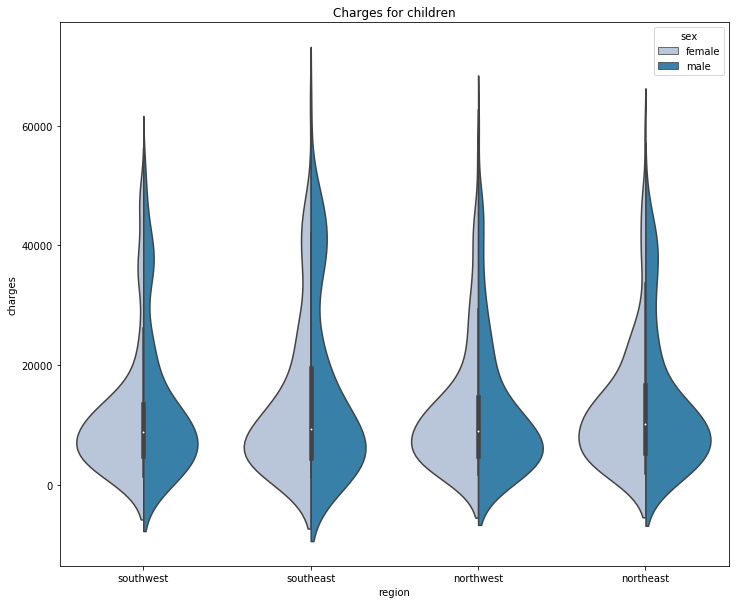

In [12]:
fig=plt.figure(figsize=(12,10))
sns.violinplot(x='region',y='charges',hue='sex',palette='PuBu',data=ins,split=True)
plt.title('Charges for children')

Text(0.5, 1.0, 'charges vs bmi')

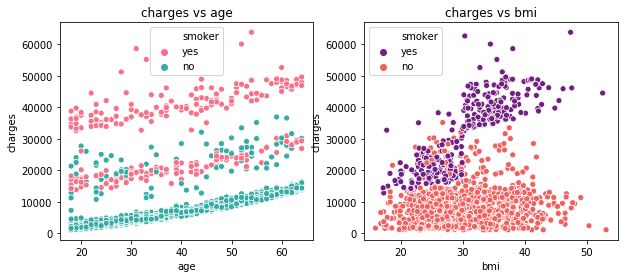

In [13]:
fig=plt.figure(figsize=(10,4))
pt=fig.add_subplot(121)
sns.scatterplot(x='age',y='charges',palette='husl',hue='smoker',data=ins)
plt.title('charges vs age')

pt=fig.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',palette='magma',hue='smoker',data=ins)
plt.title('charges vs bmi')
plt.title('charges vs bmi')

So, above plots showing us clearly about the charges according to age in the left figure

And the right figure shows charges according to bmi 

Data Preprocessing

Encoding
In Machine Learning algorithms cannot work with categorical data,so it has to converted to numbers.

We are using Dummies to convert them into numerical data.

In [14]:
dummies=['sex','children','smoker','region']
num=pd.get_dummies(data=ins,columns=dummies,drop_first=True,prefix=None)

In [15]:
num.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


Train Test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=num.drop('charges',axis=1)#independent variable
y=num['charges']#dependent variable

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [73]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
print(lm.intercept_)

-13795.486724496914


In [75]:
print(lm.coef_)

[  263.52491621   389.32313892  -546.99787222  1228.61560087
   629.43171065   980.14532303  1621.23480721  1825.81981784
 23605.50699425   -34.18747737  -636.7623932   -301.42896245]


In [76]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['coefficent'])
coeff_df

,coefficent
age,263.524916
bmi,389.323139
sex_male,-546.997872
children_1,1228.615601
children_2,629.431711
children_3,980.145323
children_4,1621.234807
children_5,1825.819818
smoker_yes,23605.506994
region_northwest,-34.187477


In [77]:
predictions=lm.predict(x_test)

In [78]:
predictions

array([ 8627.36157423, 18382.18696673,  8165.02840833,  5128.17147949,
       17152.1898075 ,  8167.27665366, 40368.85782162, 18122.12458204,
        5192.78450831,  2539.69615358, 14508.5990225 , 32330.83638626,
        8359.19242458, 41277.97967196, 10602.65354485, 11032.61256016,
       34203.53551027,  8585.8405283 ,  2885.1067599 ,  5749.66429605,
       16180.38334362,  9803.71900596,  8541.47737741, 16196.88452226,
        4262.82765086,  5022.37749405, 12923.49995146,  2064.12436542,
        3074.85218418,  3868.01871678,  8561.86082844,  5649.98639849,
       36082.12230736,  6592.91210494,  9490.11742348, 24544.92167741,
       29996.53198413, 27090.20224161, 13205.7813454 , 30782.72703486,
       19294.32168612,  5476.90385458,  9058.48722359,  2400.94469876,
       12887.9036726 ,  6072.54150373,  6677.64484746, 18224.80756568,
        8821.52091824,  -714.37044654,  6162.82113771, 13197.64981227,
       11736.90134916,  7337.46796151, 10184.0560218 , 12604.47468938,
      

In [79]:
np.mean(y_test)

12847.79832569507

In [83]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions))
np.mean(y_test)
print('R square:',lm.score(x_test,y_test))

Mean Absolute Error: 4326.015099217851
R square: 0.7374618366178103
